## CNN复习和编码

在cnn神经网络里面 主要涉及了5个函数。

 1.卷积（conv）
 2.激活（Rule）
 3.最大池化（maxpooling）
 4.全连接（FC）
 5.分类（softmax）


 ### 卷积。
在卷积神经网络里面第一层就是卷积层
放一张图，来看看卷积神经网络的数学运行方式。
  如下图：
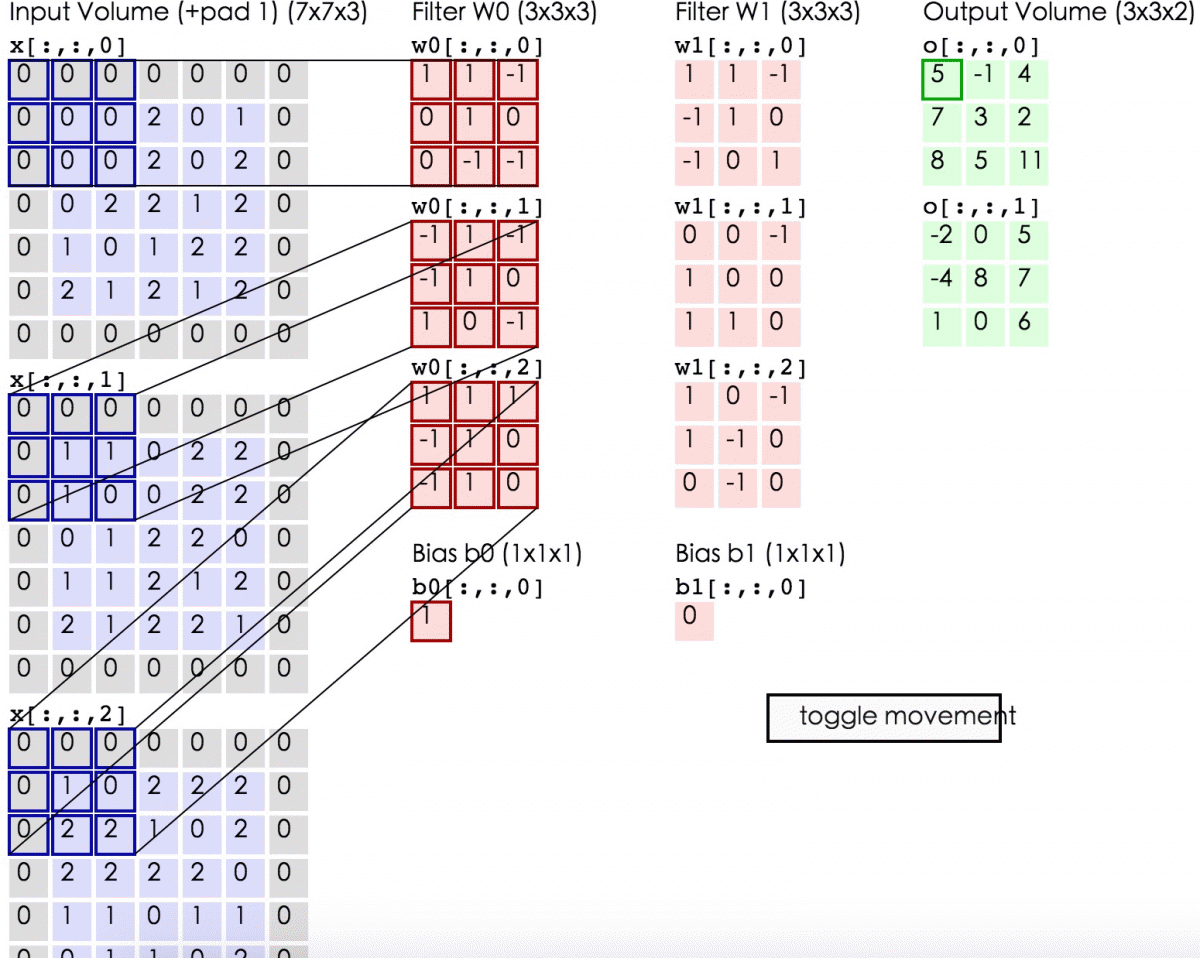

在卷积神经网络中需要了解几个知识点 ：
1.卷积核
2.步长(strides)
3.是否和原来的图像大小一样(padding)有两个选择,一个是SAME,在进过卷积之后图片的大小和原来的输入的图片大小一样, 在遇到图片大小不够的时候会使用"0"来填充, 还有一个参数是"VALID",如果使用的这个参数, 在卷积的时候不会使用"0"进行填充,输出会比输入大小小2x2,比如原来的大小是9x9的大小在步长为1,padding=VALID 输出的大小就是7x7的大小.
padding = 'SAME'：向下舍入（仅考虑全尺寸窗口）。
padding = 'VALID'：向上舍入（包括部分窗口）。
<hr>
卷积核一个几维乘几维乘厚度的一个张量， 如果二维里面，卷积就是一个正方形的大小，图像里面的维度大小来看的话，卷积就是一个长方体。
卷积核的大小，在最近几年的发展里面，卷积核的大小为3x3，卷积核的作用就是在卷积操作的时候，提前图片的特征出来，比如在卷积核为
[[1,1,1],[0,0,0],[0,0,0]] 3x3的大小，这卷积核的作业就是把图形的最上面的特征提取出来。一个层的卷积一共有64层，或者是32层。

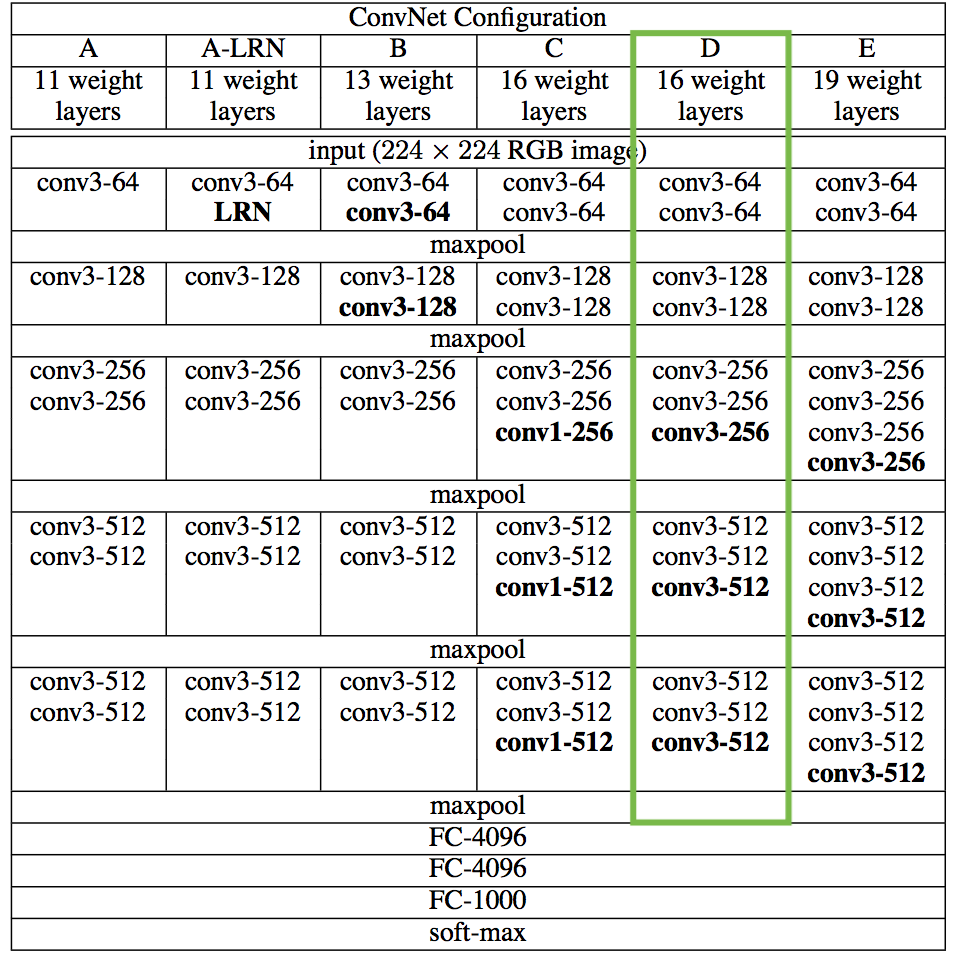
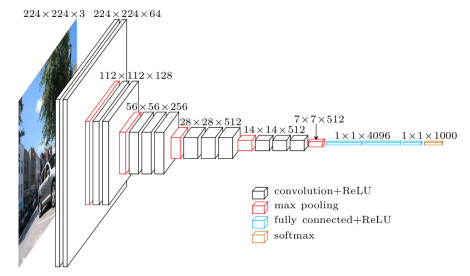

在vgg16里面的第一层的卷积核的大小的是（3x3x64），在第二层之后的大小（3x3x128）。

In [2]:
# 在使用tensorflow的时候要先知道tensorflow的工作原理, 三步, 第一: 计算图(图像,graph), 第二:构建图, 第三部才是会话(session)
# 使用代码进行编程，使用是tensorflow的代码。
# 在python中定以一个出的数据, 可以直接使用 a = 1
# 在tensorflow里面顶一个一个 数据 需要指明数据的(类型,和是否可变)

# 张量, 0维的是数,1维的是向量, 2维的矩阵, 3维的张量, 所有的都可以称为张量

# tf.constannt(张量) 不可训练的常量
# tf.Variable(张量) 可以训练的量

import tensorflow as tf

D:\Anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# 定义一个卷积神经网络 如果参数使用image 后面的卷积层使用这个参数就做不到字明达意,使用input便于理解
def conv_1(input, weight, bias):
    conv = tf.nn.con2d(input, tf.constant(weight), strides=(1, 1, 1, 1), padding="SAME")
    return tf.nn.bias_add(conv, bias)
# tf.nn.conv2d 这里使用tensorflow的方法  在nn的模块里面有卷积的函数,,


### 激活函数 
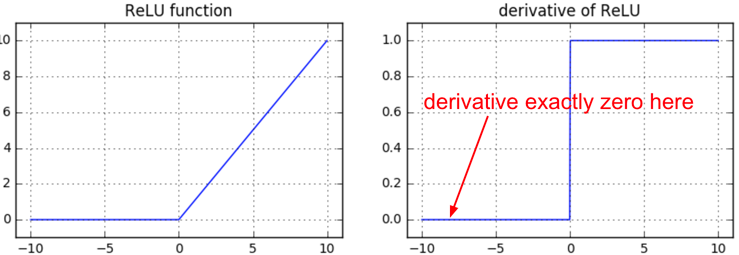

在使用rule激活函数之后,数据小于0的数就会改成0,大于0的数据不会变. 
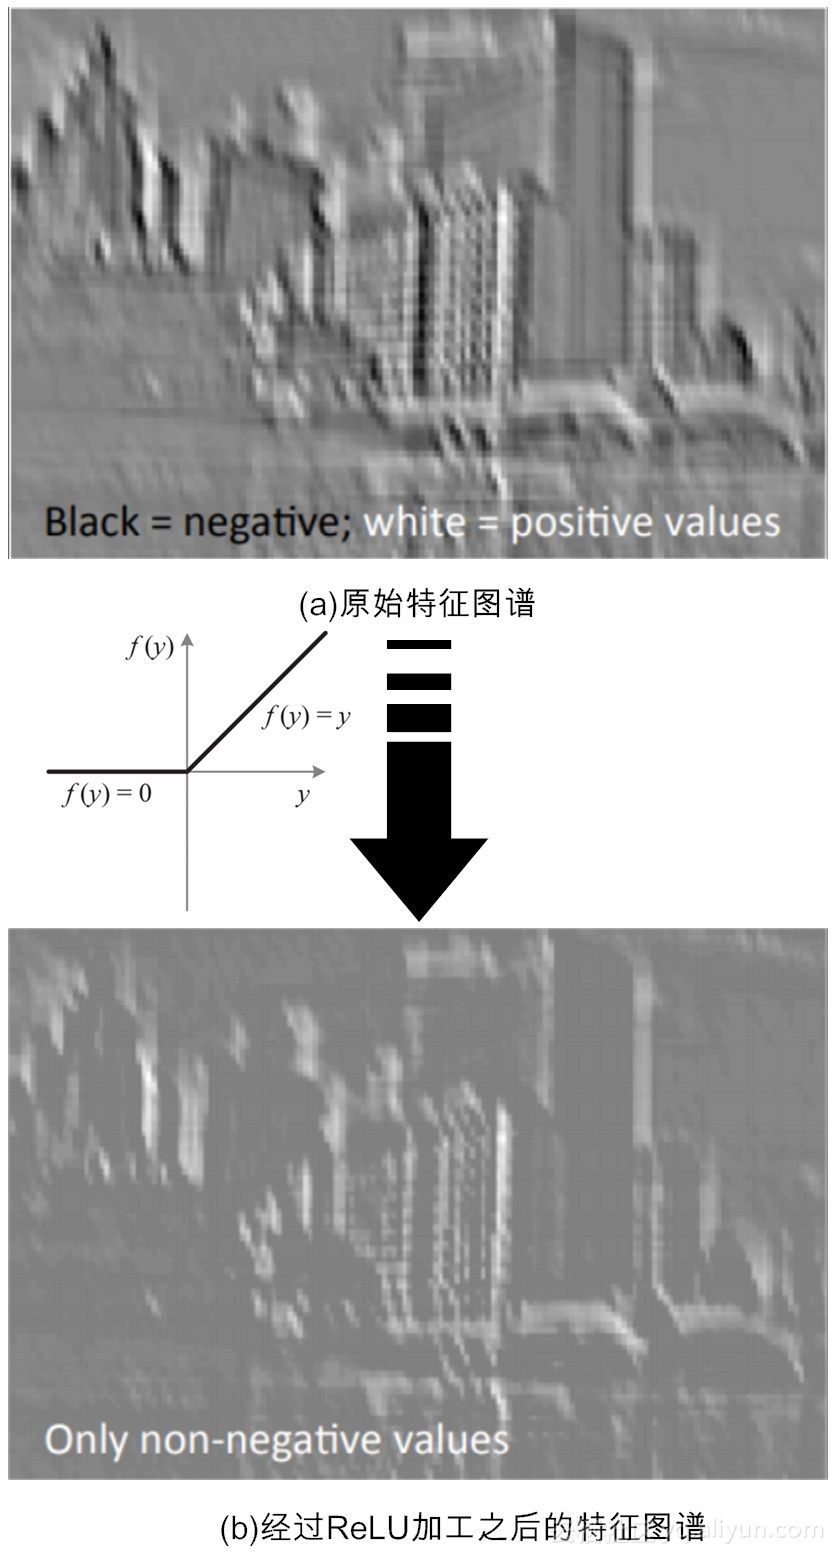
在经过激活函数之后,图片的部分把黑色的部分去掉了,只留下的灰色和白色的.
除了relu激活函数之外,还有sigmiod激活函数,在卷积网络里面使用的是relu函数.

In [1]:
# 激活函数 Rlue函数, 使用是relu激活函数
def relu(input):
    return tf.nn.relu(input)

### 最大池化
在使用池化的时候也需要注意几个点:
 1.池化的核的大小 
 2.步长
 3.是否全窗口 
 (这个地方都是与卷积的地方相似)
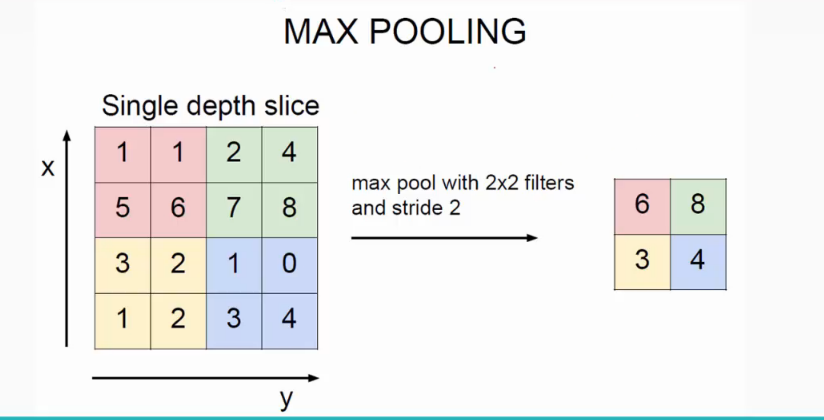

In [ ]:
# 最大全连接
def max_pool(input):
    return tf.nn.max(input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

In [2]:
# 定义全连接
def fc(input, i_shape, o_shape):
    # 先全连接 在使用激活函数 wx + b
    fc_h = tf.add(tf.matmul(input, w) + b)
    fc_o = tf.nn.relu(fc_h)
    return fc_o

In [ ]:
# 分类层,经过前面的全连接的最后输出10个数字,或者2和数字